# Задача

Найти минимум функции на множестве: $$\min\limits_{x\in X}f(x)$$

## Множество

$X\in\mathbb{R}^n$, $n\in\{100, 200, 500, 1000\}$

1. $X$ симплекс
2. $X$ сфера

## Функция

$$f(x) = x^TAx - b^Tx$$

$А$ — 
* случайная [0,L] матрица
* элементы равномерно распределены
* регуляризованная как 
$A - \lambda_{\min}(A)I$, где $I$ — единичная матрица

## Методы
1. Градиентный спуск (Правило Армихо, критерий остановки)
2. Субградиенты (постоянный шаг, Шаг по Поляку)
3. Зеркальный спуск с Энтропийным сетапом 
4. Быстрые градиенты Нестерова
5. Градиентный спуск в 1 норме (если дойдем)

## Графики

1. Производительность
2. Убывание функционала либо невязки

In [1]:
import numpy as np
from numpy import linalg
%matplotlib inline
import matplotlib.pyplot as plt

In [60]:
# Размерность пространства
n=50
# Случайная матрица
S0=np.random.randn(n,n)

In [61]:
# Ортогонализация Грамма-Шмидта
S=np.copy(S0)
for i in range(n):
    S[i] = np.copy(S0[i])
    for j in range(i):
        S[i] -= S[j] * np.dot(S[i], S[j]) / np.dot(S[j], S[j])
    S[i] /= np.sqrt(np.dot(S[i], S[i]))

In [62]:
# Проверяем ортогональность
np.allclose(np.dot(S.T,S), np.eye(n))

True

In [63]:
# Собственные числа матрицы A
D=np.diag(np.array(range(n)) + 1)
A=np.dot(S.T, np.dot(D, S))
# Вектор b
b=np.random.rand(n)

In [64]:
# Градиент функции
def grad(x):
    return(np.dot(A, x) - b)

In [65]:
# Функция
def func(x):
    return(0.5 * np.dot(x.T, np.dot(A, x))-np.dot(b, x))

In [66]:
def p(x):
    norm = linalg.norm(x)
    if norm <= 1:
        return(x)
    else:
        return(x / norm)
def dist(x):
    return(linalg.norm(x - p(x)))

In [67]:
def method_info(x):
    y = np.zeros((len(x)))
    x_dist = np.zeros((len(x)))
    step = np.zeros((len(x)))

    for i in range(len(x)):
        y[i] = func(x[i])
        x_dist[i] = linalg.norm(x[i]-p(x[i]))
        
        if i >= 1:
            step[i] = linalg.norm(x[i] - x[i - 1])
        
    imin = np.argmin(y)
    y -= func(x[imin])
    
    x_diff_norm = linalg.norm(x[:]-x[imin], axis=1)

    ms = 3
    
    print "Best: " + str(imin) + " f = " + str(func(x[imin]))
    print "Last: " + str(len(x))
    
    plt.figure(figsize=(10,10))
    plt.subplot(3, 1, 1)
    plt.plot(x_diff_norm, 'g.', label=r"$||x_i-x_{best}||$", ms=ms)
    plt.legend(loc='upper right', fontsize=18)
    #plt.xlabel('$i$', fontsize=25)
    
    plt.subplot(3, 1, 2)
    plt.plot(step, 'b.', label=r"$||x_i-x_{i-1}||$", ms=ms)
    plt.legend(loc='upper right', fontsize=18)
    #plt.xlabel('$i$', fontsize=25)
    
    plt.subplot(3, 1, 3)
    plt.plot(y, 'r.', label=r"$f(x_i)-f(x_{best})$", ms=ms)
    plt.legend(loc='upper right', fontsize=18)
    plt.xlabel('$i$', fontsize=25)
    
    #plt.savefig("chart.png")

    # display plot on screen
    plt.show()

In [68]:
def armiho(x, a0, theta, eps):
    # Выбор шага по Армихо
    a = a0
    grad_norm_2 = np.linalg.norm(grad(x)) ** 2
    while True:
        x_new = x - a * grad(x)
        if func(x_new) - func(x) + eps * a * grad_norm_2 < 0:
            break
        a *= theta
    return a

In [82]:
# Массив с точками
x = list()
x.append(np.zeros(n))
i = 1

# Выбор шага по Армихо, параметры
a0 = 1
theta = 0.8
eps = 0.1

# Условия остановки
grad_norm=1e-4
maxiter=10000
x_norm=1e-5

while True:
    x.append(0)
    
    a = armiho(x[i - 1], a0, theta, eps)
    # Градиентный шаг
    x[i] = x[i - 1] - a * grad(x[i - 1])
    #x[i] = p(x[i])
    
    norm_new = np.linalg.norm(grad(x[i]))
    #print a, x[i], func(x[i]), norm_new, dist(x[i])
    
    # Условия останова
    if norm_new < grad_norm:
        break
    
    if np.linalg.norm(x[i] - x[i - 1]) < x_norm:
        break
    
    if i >= maxiter:
        break
        
    i += 1

In [ ]:
method_info(x)

In [11]:
def newl(l):
    return((1 + np.sqrt(1 + 4 * l ** 2)) / 2)
def gamma(l, s):
    return((1-l[s])/l[s+1])

In [80]:
# Массив с точками
l = list()
x = list()
y = list()
x.append(np.zeros(n))
y.append(x[0])
y.append(x[0])
x.append(x[0])
l.append(0)
l.append(newl(0))
s = 1

# Условия остановки
#grad_norm=1e-5
#maxiter=10000
#x_norm=1e-5

while True:
    x.append(0)
    y.append(0)
    l.append(0)
    
    a = armiho(x[s], 1, 0.8, 0.3)
    
    l[s + 1] = newl(l[s])
    g = (1 - l[s]) / l[s + 1]
    
    y[s + 1] = x[s] - a * grad(x[s])
    x[s + 1] = (1 - g) * y[s + 1] + g * y[s]
    
    norm_new = np.linalg.norm(grad(x[s + 1]))
    #print a, g, l[s + 1], func(x[s + 1]), norm_new
    
    # Условия останова
    if norm_new < grad_norm:
        break
    
    if np.linalg.norm(x[s + 1] - x[s]) < x_norm:
        break
    
    if s >= maxiter:
        break
        
    s += 1

Best: 175 f = -0.619998517434
Last: 180


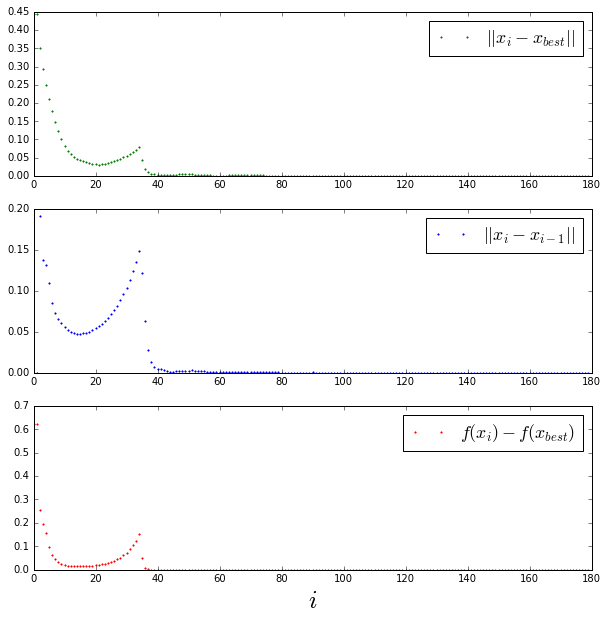

In [81]:
method_info(x)